In [1]:
import open3d as o3d
import numpy as np
# only needed for tutorial, monkey patches visualization
import open3d_tutorial 

# Point Cloud
This tutorial demonstrates basic usage of a point cloud.

## Visualize point cloud
The first part of the tutorial reads a point cloud and visualizes it.

Load a ply point cloud, print it, and render it
geometry::PointCloud with 196133 points.
[[0.65234375 0.84686458 2.37890625]
 [0.65234375 0.83984375 2.38430572]
 [0.66737998 0.83984375 2.37890625]
 ...
 [2.00839925 2.39453125 1.88671875]
 [2.00390625 2.39488506 1.88671875]
 [2.00390625 2.39453125 1.88793314]]


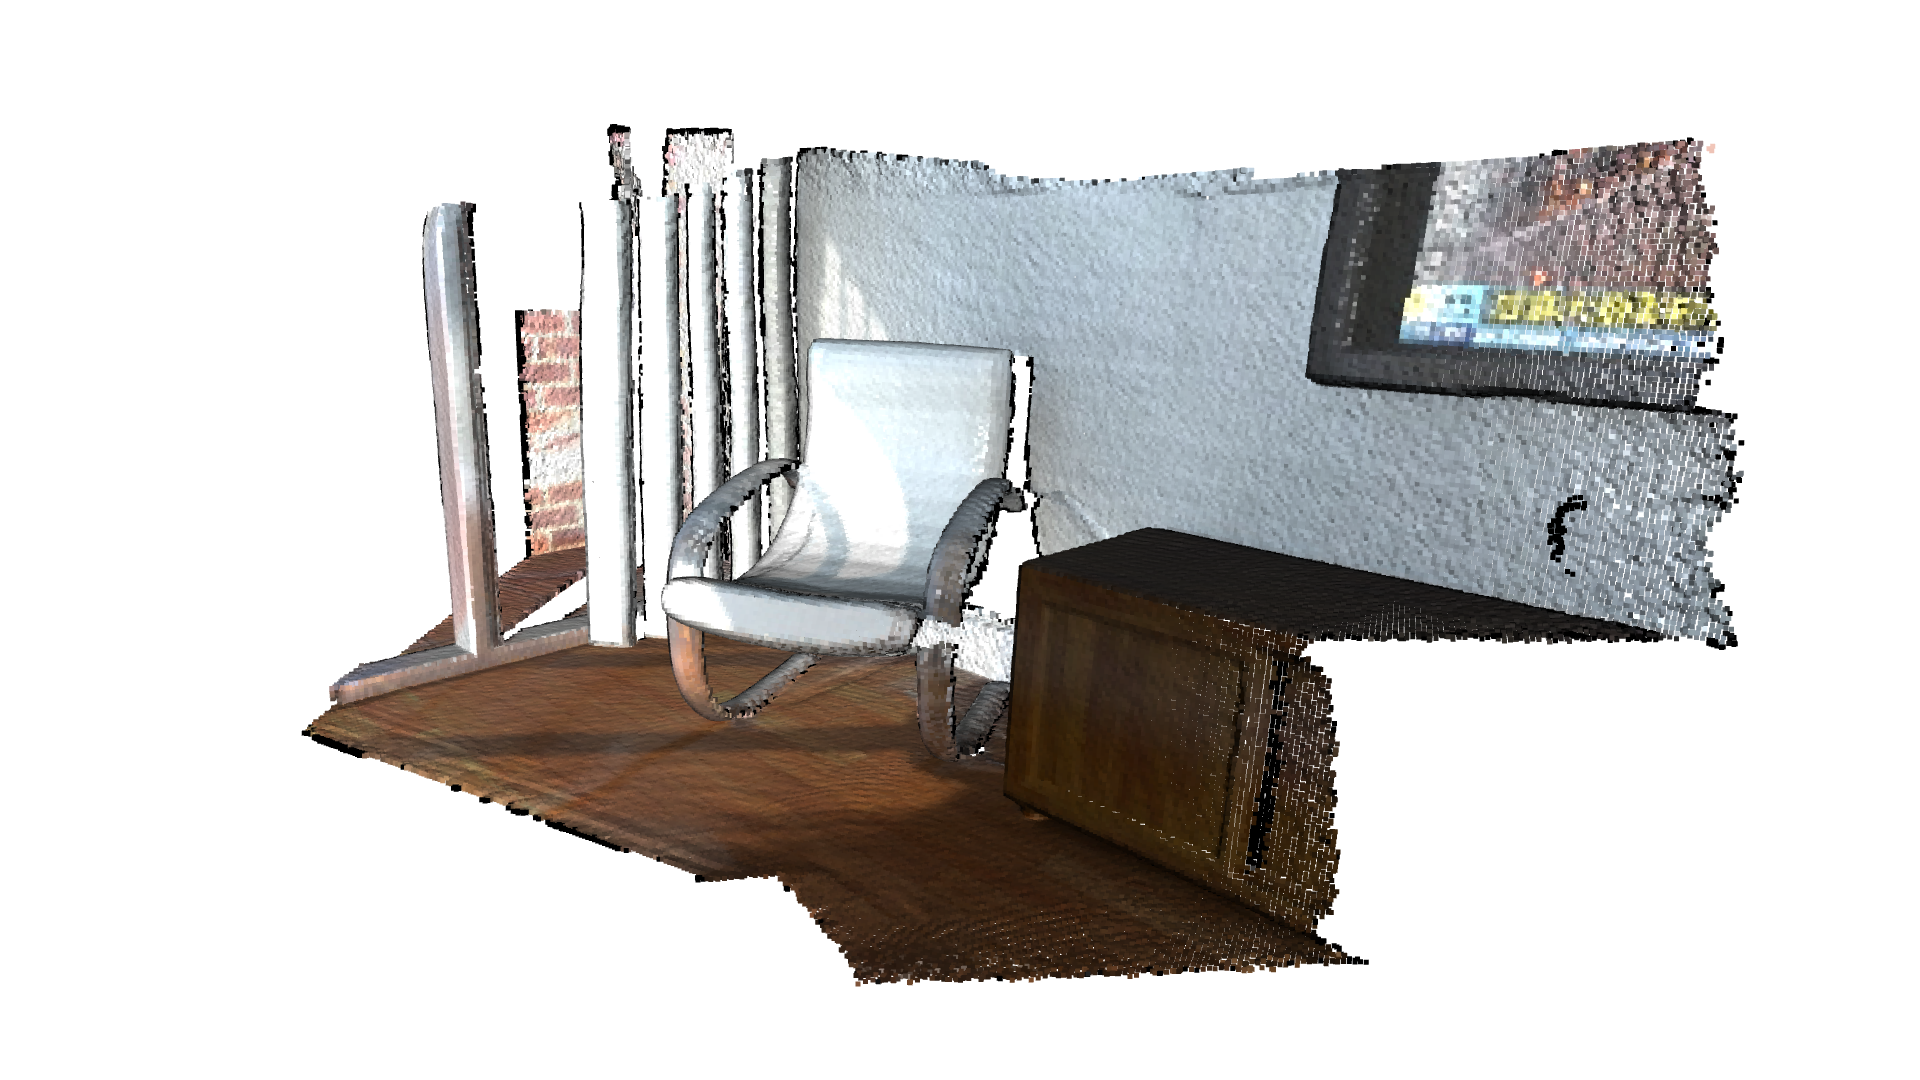

In [2]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud("../../TestData/fragment.ply")
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd])

`read_point_cloud` reads a point cloud from a file. It tries to decode the file based on the extension name. The supported extension names are: `pcd`, `ply`, `xyz`, `xyzrgb`, `xyzn`, `pts`.

`draw_geometries` visualizes the point cloud. Use mouse/trackpad to see the geometry from different view point.

It looks like a dense surface, but it is actually a point cloud rendered as surfels. The GUI supports various keyboard functions. One of them, the - key reduces the size of the points (surfels).

**Note:** Press `h` key to print out a complete list of keyboard instructions for the GUI. For more information of the visualization GUI, refer to Visualization and Customized visualization. TODO links

**Note:** On OS X, the GUI window may not receive keyboard event. In this case, try to launch Python with `pythonw` instead of `python`.

## Voxel downsampling
Voxel downsampling uses a regular voxel grid to create a uniformly downsampled point cloud from an input point cloud. It is often used as a pre-processing step for many point cloud processing tasks. The algorithm operates in two steps:

1. Points are bucketed into voxels.
2. Each occupied voxel generates exact one point by averaging all points inside.

Downsample the point cloud with a voxel of 0.05


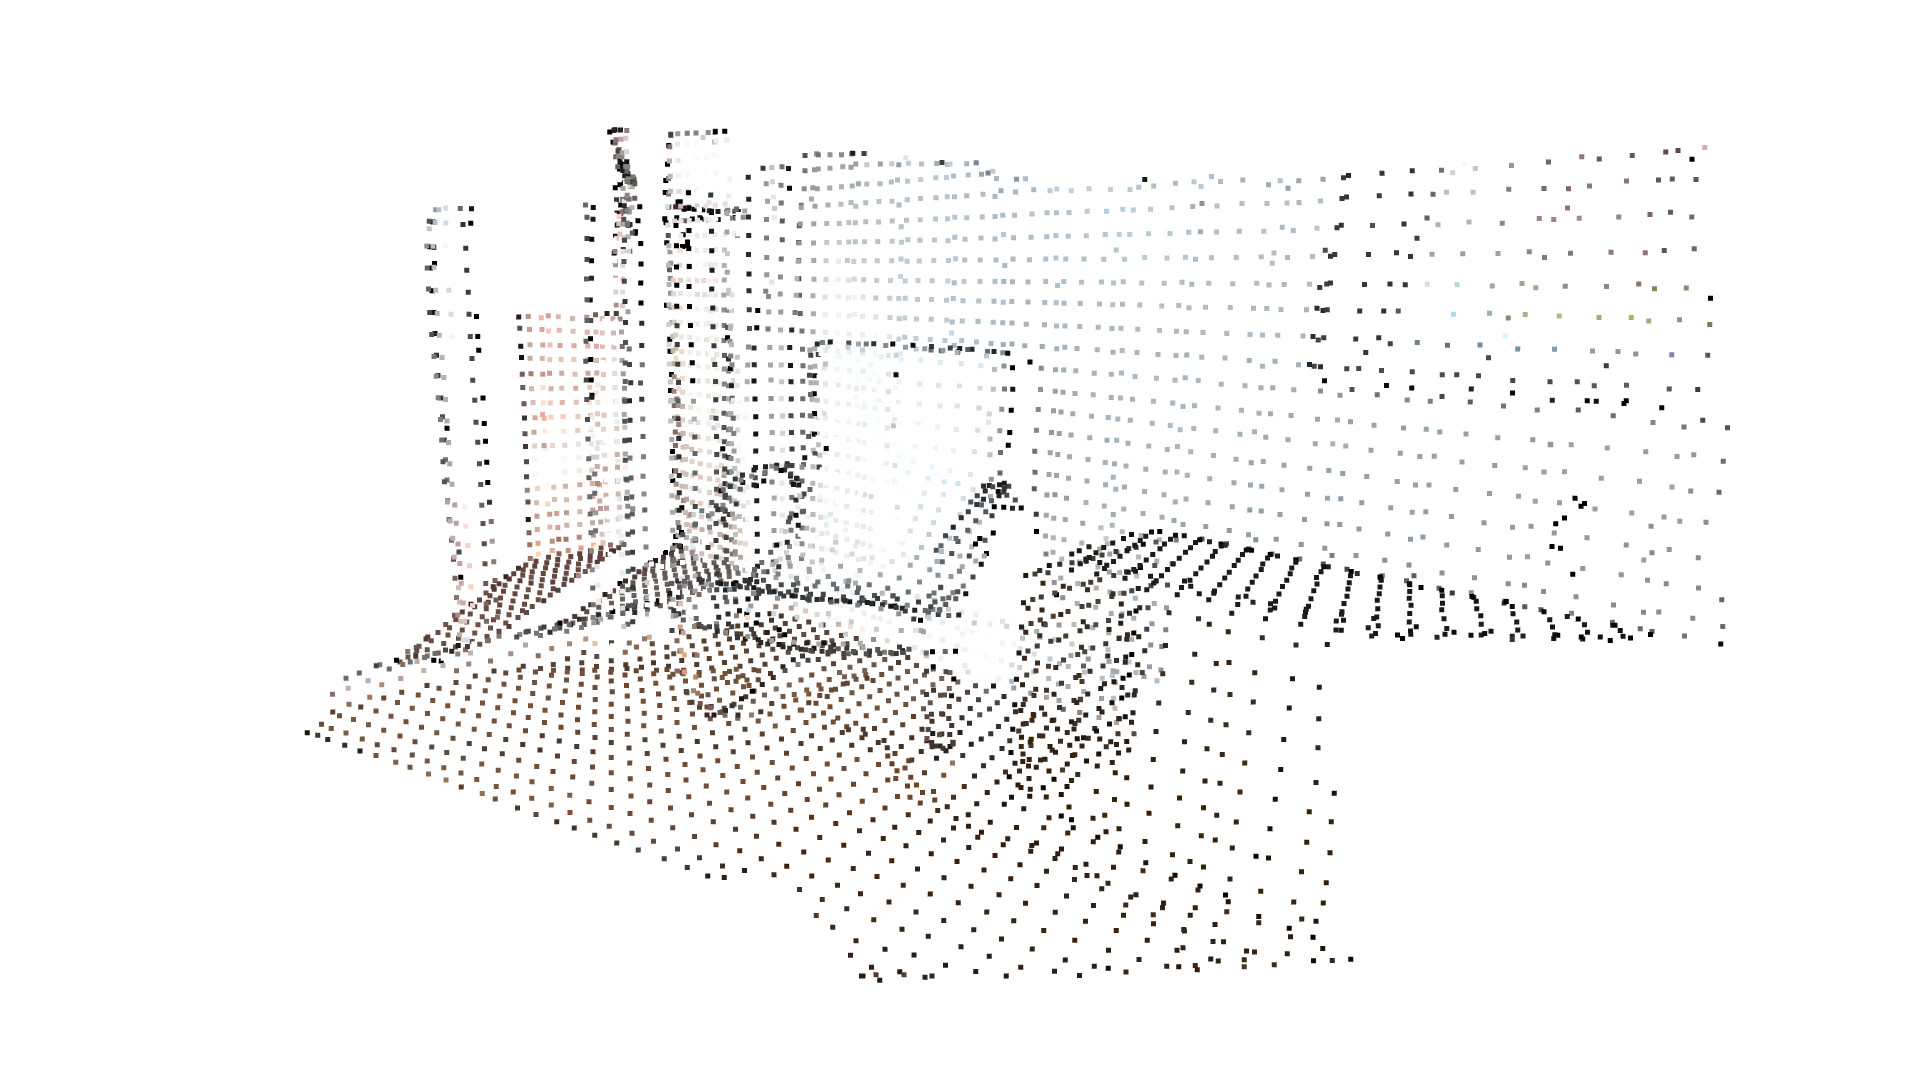

In [3]:
print("Downsample the point cloud with a voxel of 0.05")
downpcd = pcd.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downpcd])

# Vertex normal estimation
Another basic operation for point cloud is point normal estimation.
Press n to see point normal. Key - and key + can be used to control the length of the normal.

Recompute the normal of the downsampled point cloud


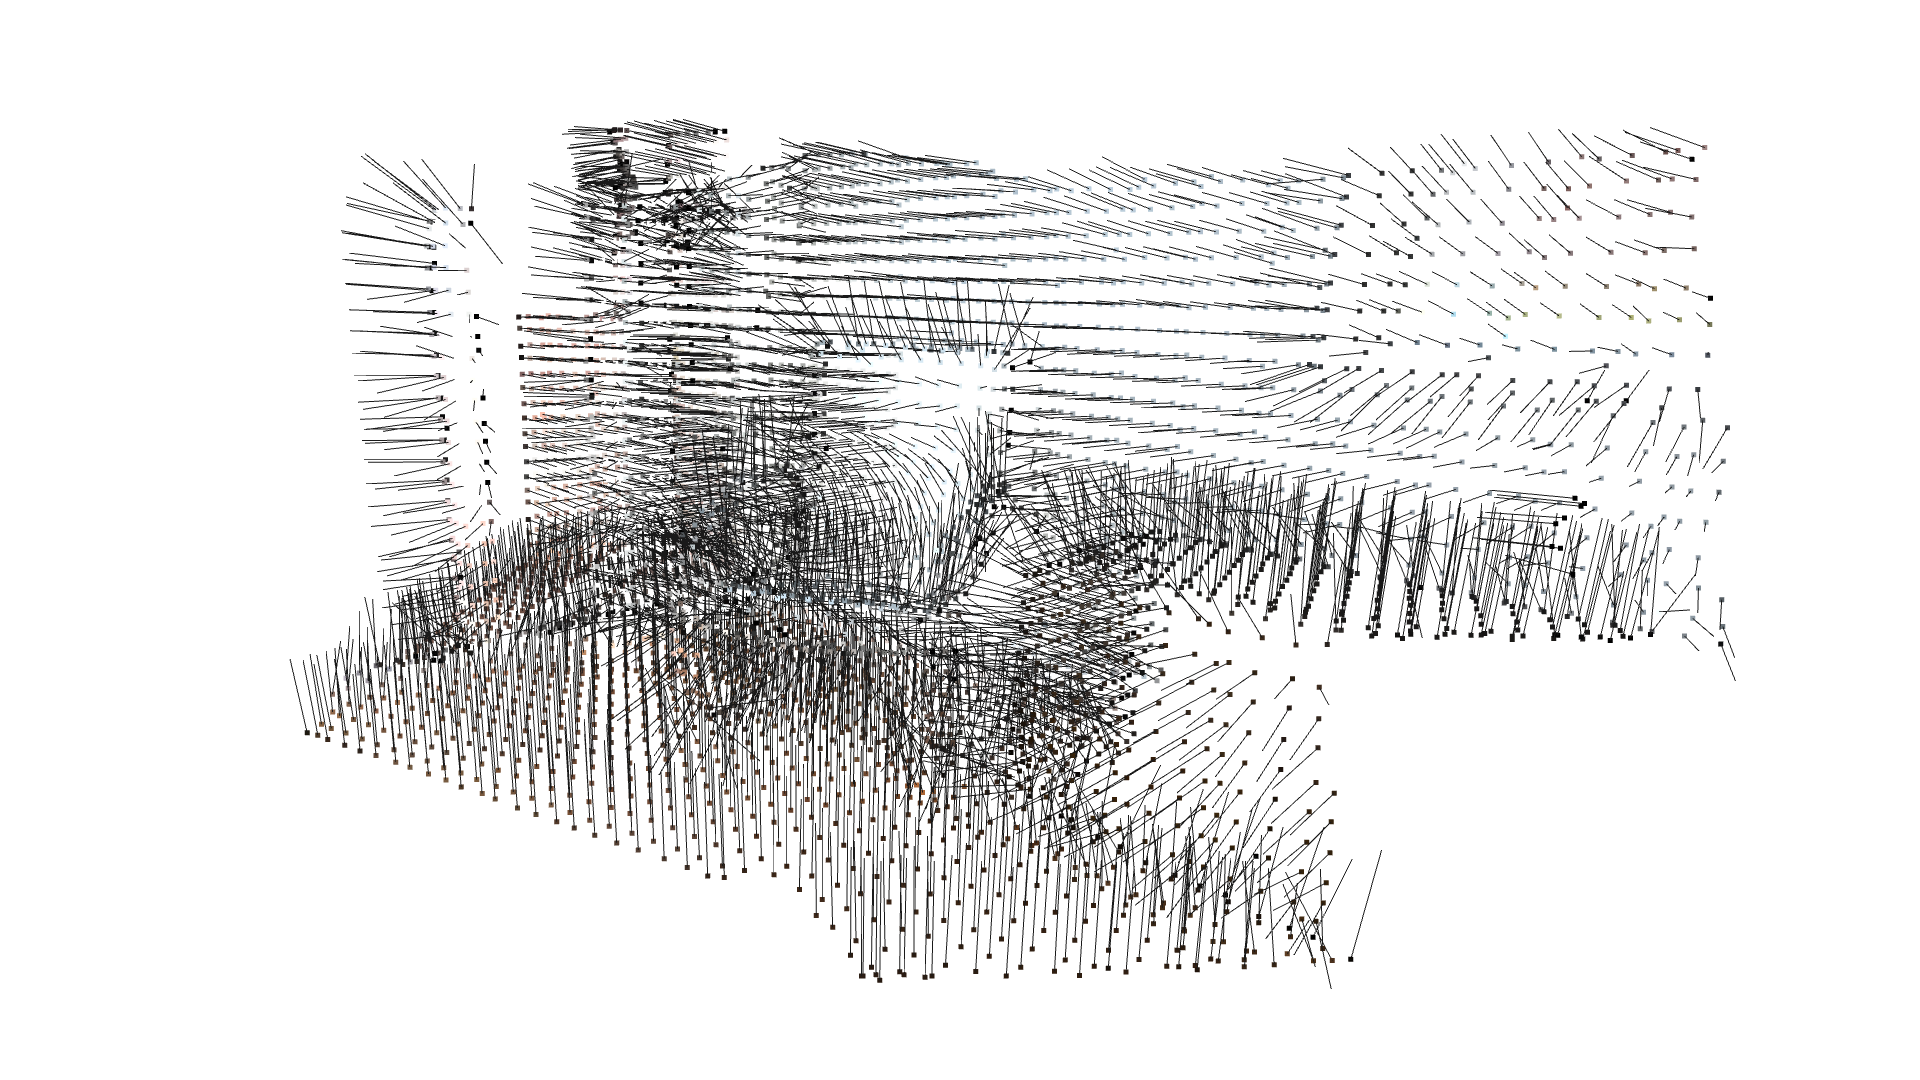

In [4]:
print("Recompute the normal of the downsampled point cloud")
downpcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
o3d.visualization.draw_geometries([downpcd])

`estimate_normals` computes normal for every point. The function finds adjacent points and calculate the principal axis of the adjacent points using covariance analysis.

The function takes an instance of `KDTreeSearchParamHybrid` class as an argument. The two key arguments `radius = 0.1` and `max_nn = 30` specifies search radius and maximum nearest neighbor. It has 10cm of search radius, and only considers up to 30 neighbors to save computation time.

**Note:** The covariance analysis algorithm produces two opposite directions as normal candidates. Without knowing the global structure of the geometry, both can be correct. This is known as the normal orientation problem. Open3D tries to orient the normal to align with the original normal if it exists. Otherwise, Open3D does a random guess. Further orientation functions such as `orient_normals_to_align_with_direction` and `orient_normals_towards_camera_location` need to be called if the orientation is a concern.

## Access estimated vertex normal
Estimated normal vectors can be retrieved by `normals` variable of `downpcd`.

In [5]:
print("Print a normal vector of the 0th point")
print(downpcd.normals[0])

Print a normal vector of the 0th point
[-0.27566603 -0.89197839 -0.35830543]


To check out other variables, please use `help(downpcd)`. Normal vectors can be transformed as a numpy array using `np.asarray`.

In [6]:
print("Print the normal vectors of the first 10 points")
print(np.asarray(downpcd.normals)[:10, :])

Print the normal vectors of the first 10 points
[[-0.27566603 -0.89197839 -0.35830543]
 [-0.00694405 -0.99478075 -0.10179902]
 [-0.00399871 -0.99965423 -0.02598917]
 [-0.46344316 -0.68643798 -0.56037785]
 [-0.43476205 -0.62438493 -0.64894177]
 [-0.51440078 -0.56093481 -0.6486478 ]
 [-0.27498453 -0.67317361 -0.68645524]
 [-0.00327304 -0.99977409 -0.02100143]
 [-0.01464332 -0.99960281 -0.02407874]
 [-0.13075895 -0.94176382 -0.30981124]]


Check Working with NumPy for more examples regarding numpy array. TODO link

## Crop point cloud

Load a polygon volume and use it to crop the original point cloud


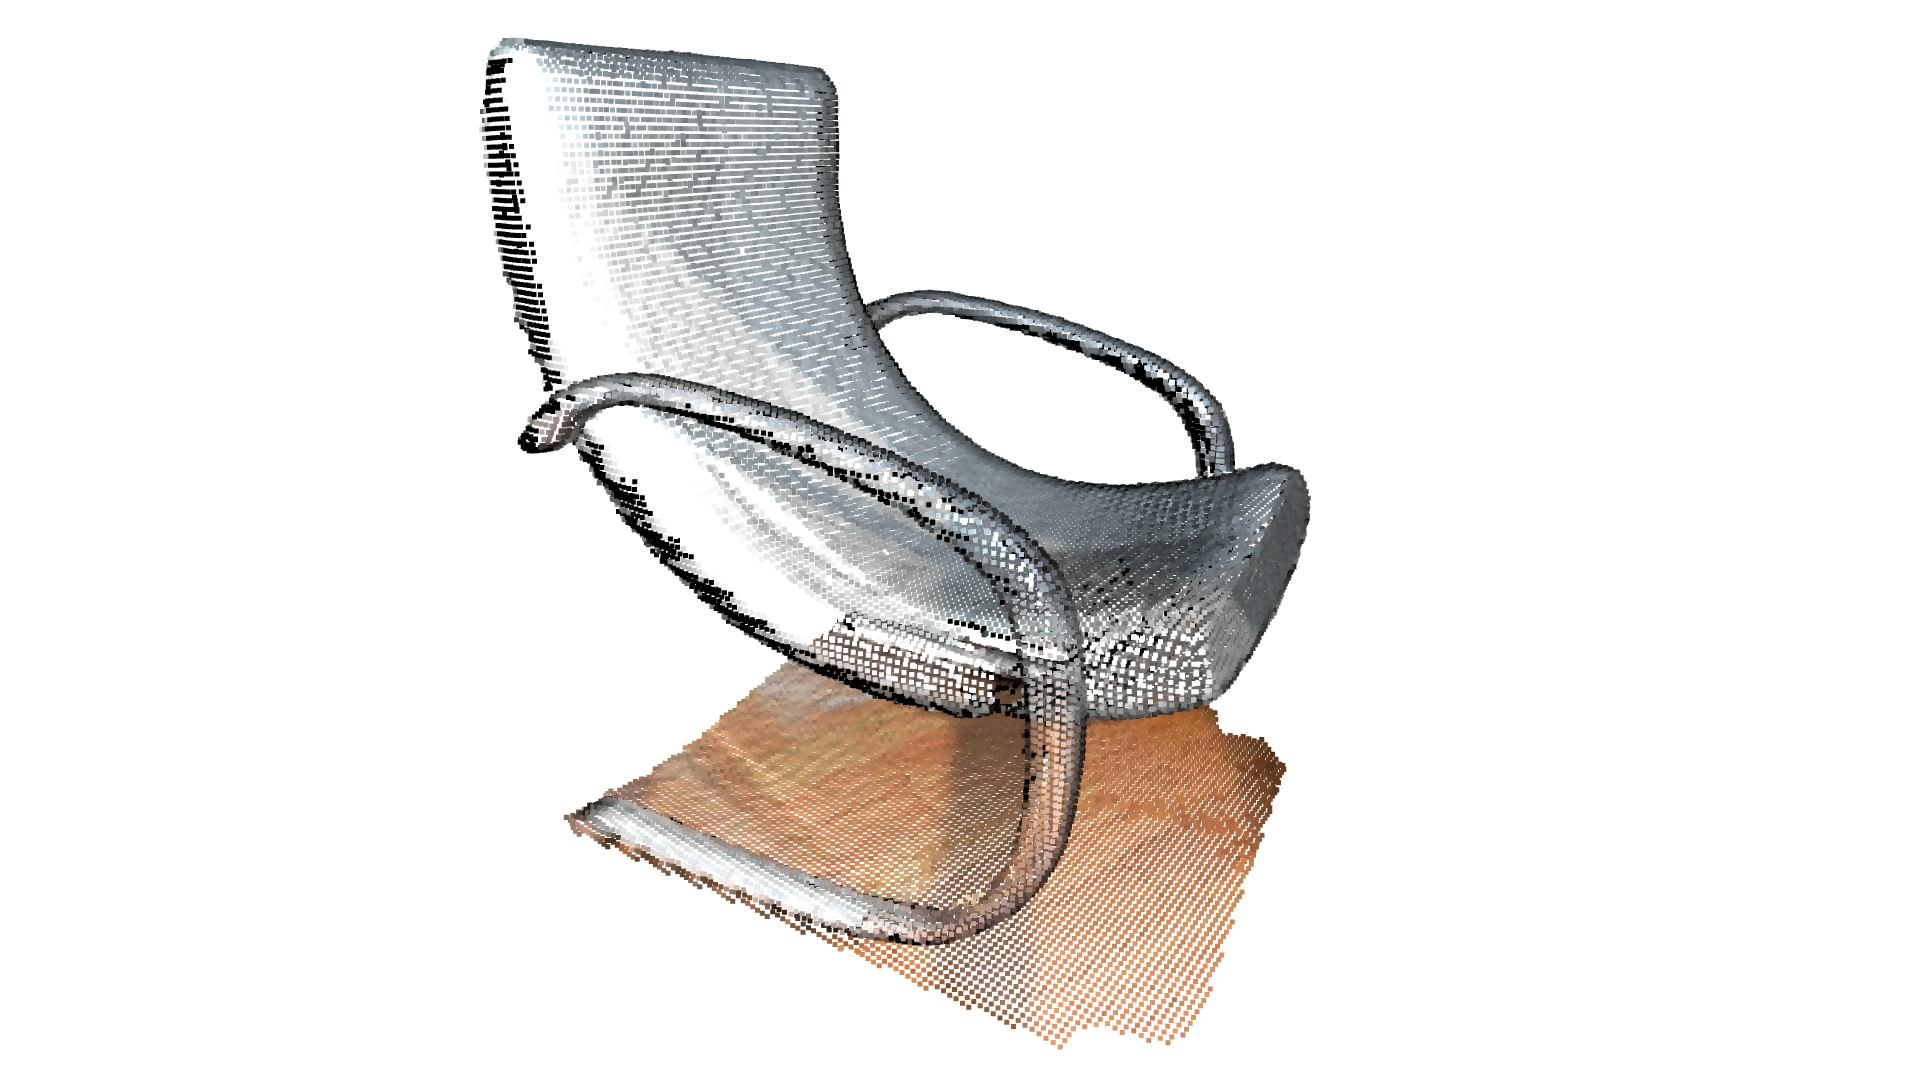

In [7]:
print("Load a polygon volume and use it to crop the original point cloud")
vol = o3d.visualization.read_selection_polygon_volume("../../TestData/Crop/cropped.json")
chair = vol.crop_point_cloud(pcd)
o3d.visualization.draw_geometries([chair])

`read_selection_polygon_volume` reads a json file that specifies polygon selection area. `vol.crop_point_cloud(pcd)` filters out points. Only the chair remains.

## Paint point cloud

Paint chair


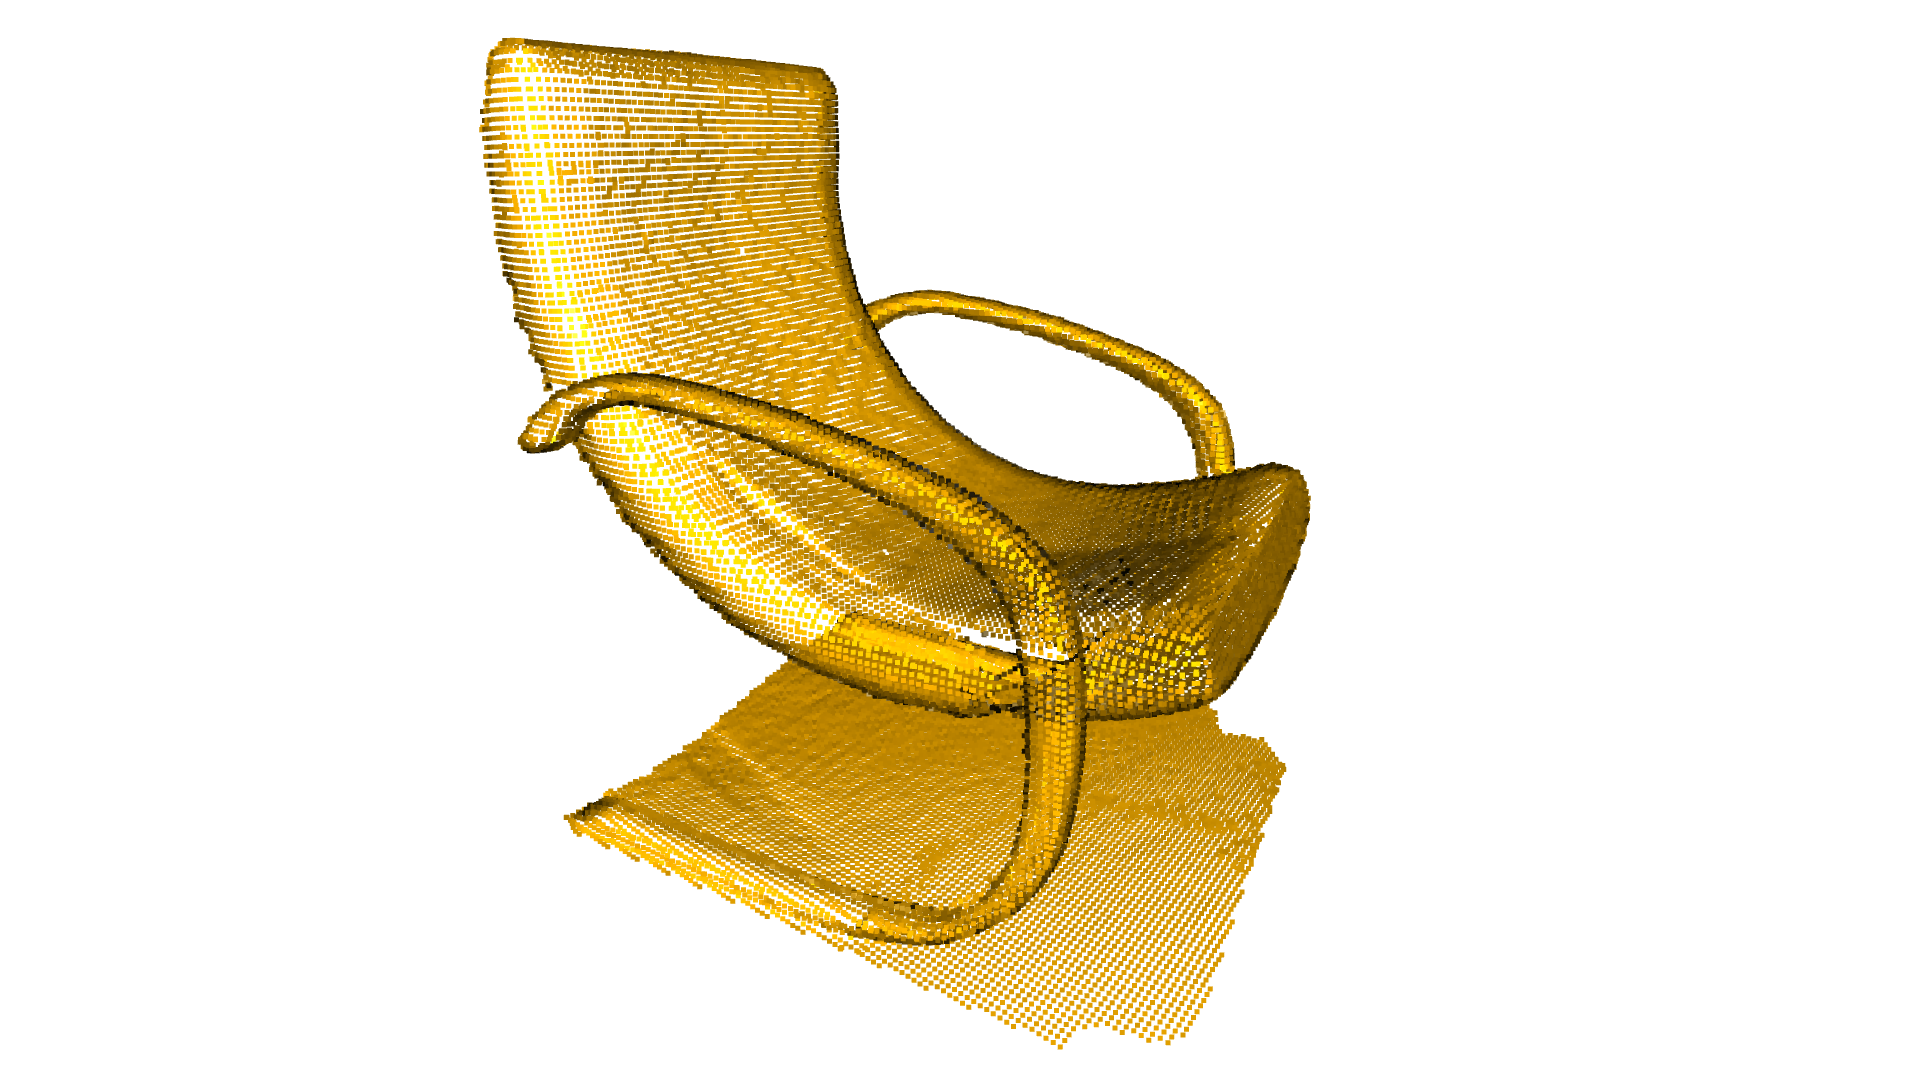

In [8]:
print("Paint chair")
chair.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([chair])

`paint_uniform_color` paints all the points to a uniform color. The color is in RGB space, [0, 1] range.